<a href="https://colab.research.google.com/github/SSRaylia/clustering/blob/master/Customer_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

**This is a public credit card dataset I found on Kaggle, which contains customer level data with various behavioral vairables for about 9,000 active credit card holders during the last 6 months. Here I planned to practice my skill in doing customer segmentation by KMeans and Hierarchical clustering method.**

**After the clustering I will check the validity of the result by comparing the credit limit range for each cluster group and their behaivor. Expected outcome would be cluster group having lower credit limit should have more installments purchase, lower balance, etc. in general.**

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata


## Data Ingestion and EDA

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/SSRaylia/clustering/master/CC%20GENERAL.csv")

In [13]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Removing NAs

In [14]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [0]:
data.dropna(inplace = True)

### Checking Range and Other Info for All Columns

In [16]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


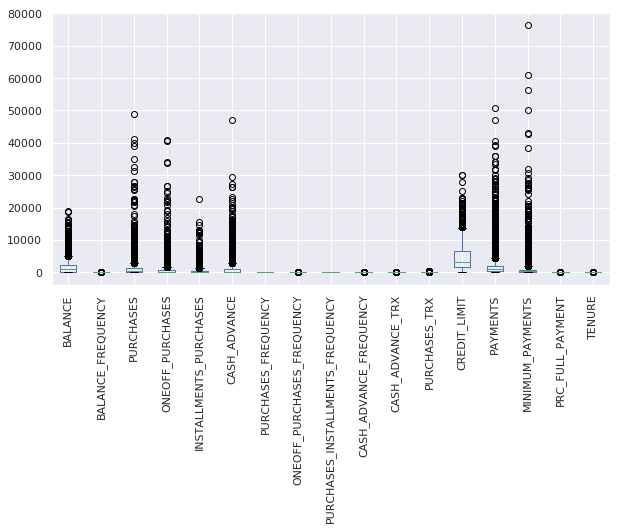

In [17]:
data.boxplot(rot=90, figsize=(10,5))

## Select Data

**Some attributes are correlated in nature, like total number of purchases, number of installments purchses and number of one-off purchases. So I will remove or only keep one of them in the dataset for clustering.**

**Besides, some attributes, like Credit Limit, are determined by the bank and shouldn't be considered as customers' behavior by definition, they are not included in the clustering dataset either.**

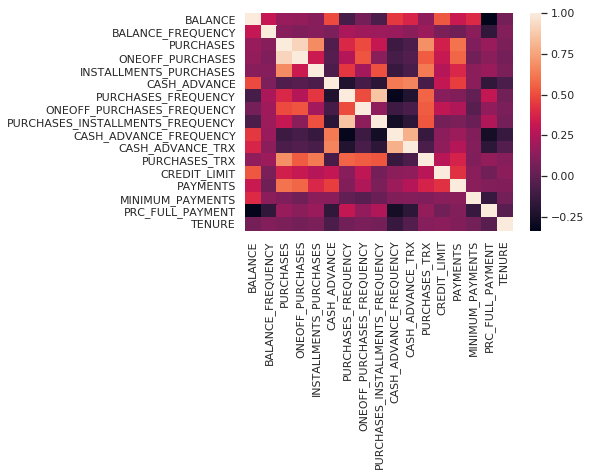

In [18]:
sns.heatmap(data.corr())

In [0]:
cluster = data.drop(['CUST_ID','BALANCE_FREQUENCY','TENURE','PURCHASES','PURCHASES_TRX','CASH_ADVANCE_TRX','PURCHASES_FREQUENCY','CREDIT_LIMIT'], axis = 1)

## Choosing Number of Principal Components

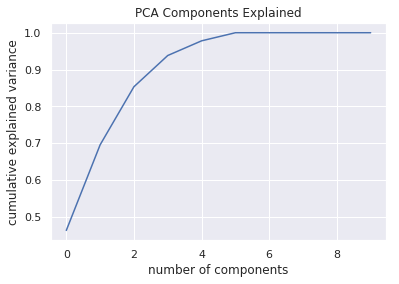

In [20]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA()
pca.fit(cluster)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA Components Explained');

In [21]:
pca.n_components = 4
cluster_reduced = pca.fit_transform(cluster)
cluster_reduced.shape

(8636, 4)

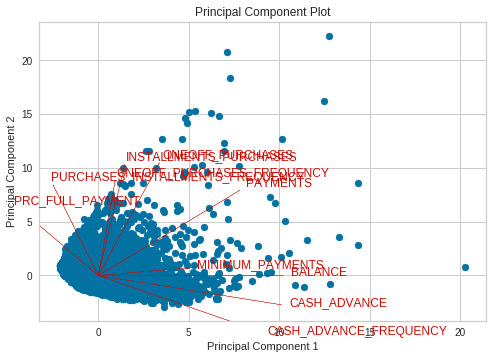

In [22]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(cluster)
visualizer.poof()

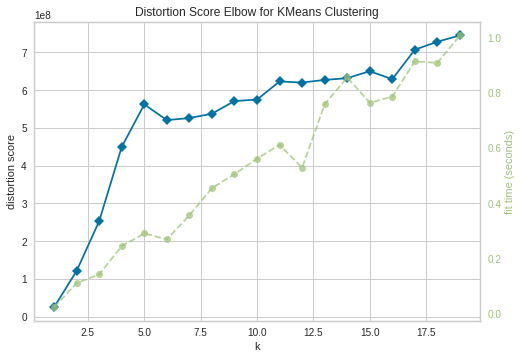

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(cluster_reduced)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

## Building Models

### KMeans

In [24]:
km = KMeans(n_clusters=3).fit(cluster_reduced)
cluster['cluster_c'] = km.labels_
cluster['cluster_c'].value_counts()

0    7053
1    1410
2     173
Name: cluster_c, dtype: int64

In [0]:
cluster['credit_limit'] = data['CREDIT_LIMIT']

Text(0.5, 1.0, 'Credit Limit')

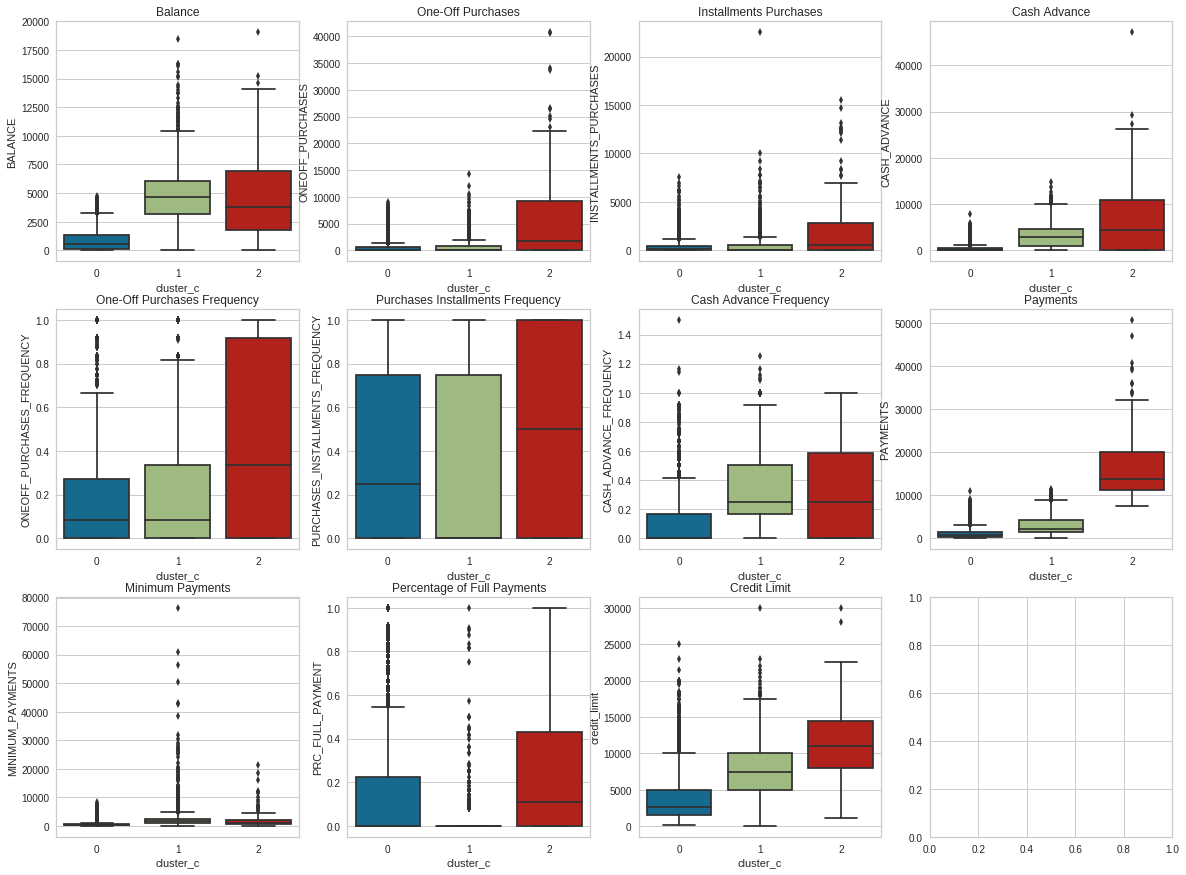

In [37]:
fig, axs = plt.subplots(ncols=4,nrows=3,figsize=(20, 15))
sns.boxplot(x='cluster_c',y='BALANCE',data=cluster,ax=axs[0,0]).set_title('Balance')
sns.boxplot(x='cluster_c',y='ONEOFF_PURCHASES',data=cluster,ax=axs[0,1]).set_title('One-Off Purchases')
sns.boxplot(x='cluster_c',y='INSTALLMENTS_PURCHASES',data=cluster,ax=axs[0,2]).set_title('Installments Purchases')
sns.boxplot(x='cluster_c',y='CASH_ADVANCE',data=cluster,ax=axs[0,3]).set_title('Cash Advance')
sns.boxplot(x='cluster_c',y='ONEOFF_PURCHASES_FREQUENCY',data=cluster,ax=axs[1,0]).set_title('One-Off Purchases Frequency')
sns.boxplot(x='cluster_c',y='PURCHASES_INSTALLMENTS_FREQUENCY',data=cluster,ax=axs[1,1]).set_title('Purchases Installments Frequency')
sns.boxplot(x='cluster_c',y='CASH_ADVANCE_FREQUENCY',data=cluster,ax=axs[1,2]).set_title('Cash Advance Frequency')
sns.boxplot(x='cluster_c',y='PAYMENTS',data=cluster,ax=axs[1,3]).set_title('Payments')
sns.boxplot(x='cluster_c',y='MINIMUM_PAYMENTS',data=cluster,ax=axs[2,0]).set_title('Minimum Payments')
sns.boxplot(x='cluster_c',y='PRC_FULL_PAYMENT',data=cluster,ax=axs[2,1]).set_title('Percentage of Full Payments')
sns.boxplot(x='cluster_c',y='credit_limit',data=cluster,ax=axs[2,2]).set_title('Credit Limit')

Here Cluster 0 makes up the majority of the customer (81.67%) and also has the lowest credit limit range (highest is around 5, 000). It also has the lowest balance, lowest amount of payments made, and lower percentage of full payments overall, which is in line with our initial assumption.

One thing needed to point out is that from the graph we actually see a lower amount of installment purchases and cash advance frequency in cluster 0, which does not seem to be the reality of people with low credit limit since they are usully not rich and may rely more on these credit card functions, I will take a deeper look into that after I improve my clustering skill.

In [0]:
data['Kmeans cluster']=cluster['cluster_c']

### Hierarchical Cluster

In [28]:
from sklearn.cluster import AgglomerativeClustering
Hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(cluster_reduced) #cosine/euclidean
cluster['Hierarchical cluster'] = Hierarchical.labels_
cluster['Hierarchical cluster'].value_counts()

2    8611
0      18
1       7
Name: Hierarchical cluster, dtype: int64

Text(0.5, 1.0, 'Credit Limit')

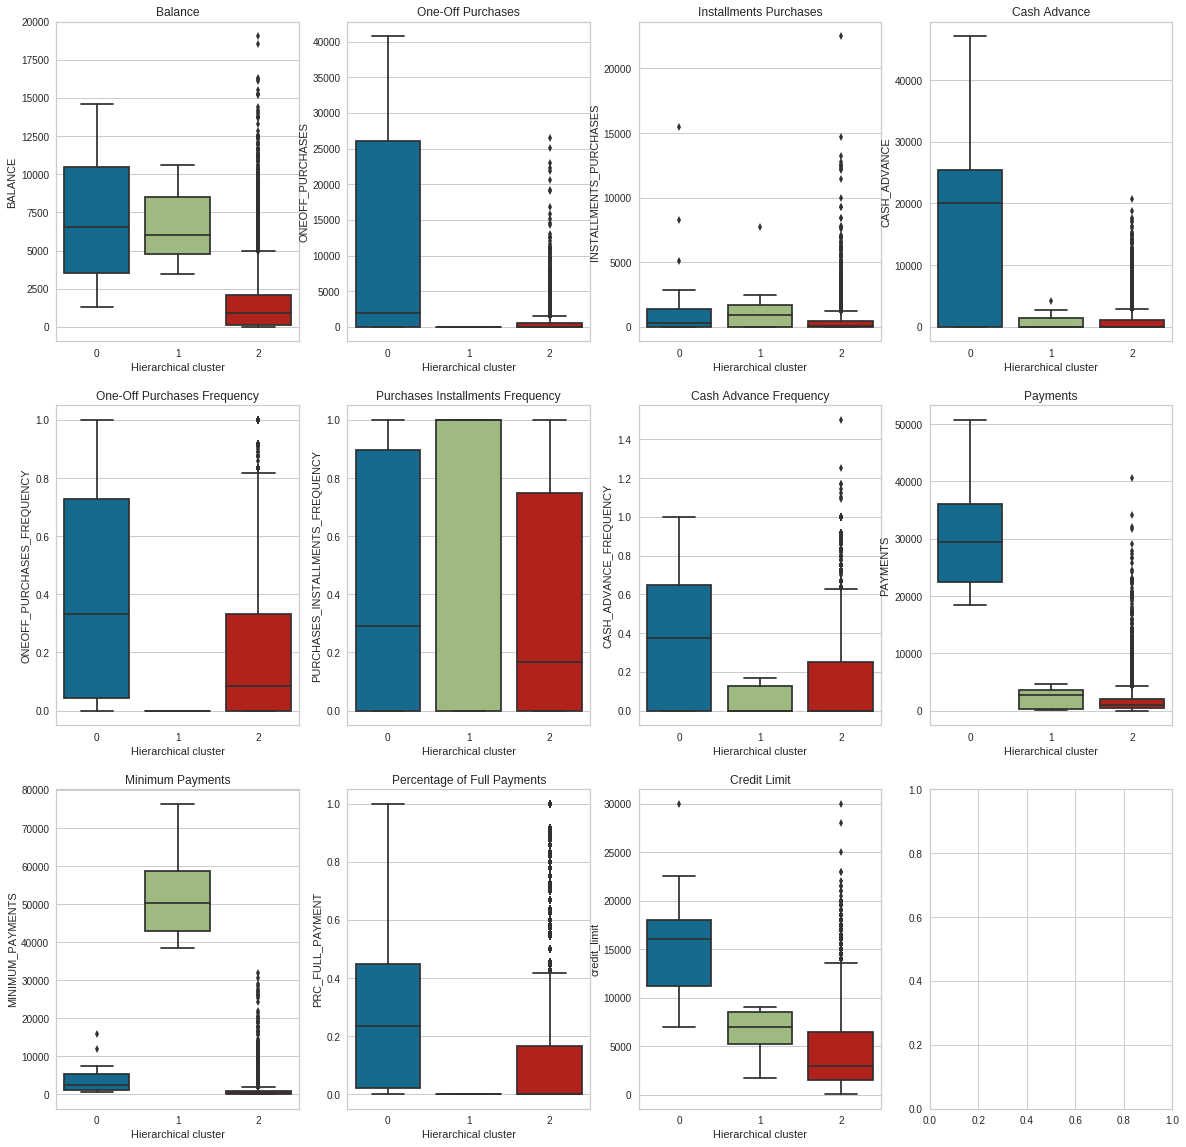

In [29]:
fig, axs = plt.subplots(ncols=4,nrows=3,figsize=(20, 20))
sns.boxplot(x='Hierarchical cluster',y='BALANCE',data=cluster,ax=axs[0,0]).set_title('Balance')
sns.boxplot(x='Hierarchical cluster',y='ONEOFF_PURCHASES',data=cluster,ax=axs[0,1]).set_title('One-Off Purchases')
sns.boxplot(x='Hierarchical cluster',y='INSTALLMENTS_PURCHASES',data=cluster,ax=axs[0,2]).set_title('Installments Purchases')
sns.boxplot(x='Hierarchical cluster',y='CASH_ADVANCE',data=cluster,ax=axs[0,3]).set_title('Cash Advance')
sns.boxplot(x='Hierarchical cluster',y='ONEOFF_PURCHASES_FREQUENCY',data=cluster,ax=axs[1,0]).set_title('One-Off Purchases Frequency')
sns.boxplot(x='Hierarchical cluster',y='PURCHASES_INSTALLMENTS_FREQUENCY',data=cluster,ax=axs[1,1]).set_title('Purchases Installments Frequency')
sns.boxplot(x='Hierarchical cluster',y='CASH_ADVANCE_FREQUENCY',data=cluster,ax=axs[1,2]).set_title('Cash Advance Frequency')
sns.boxplot(x='Hierarchical cluster',y='PAYMENTS',data=cluster,ax=axs[1,3]).set_title('Payments')
sns.boxplot(x='Hierarchical cluster',y='MINIMUM_PAYMENTS',data=cluster,ax=axs[2,0]).set_title('Minimum Payments')
sns.boxplot(x='Hierarchical cluster',y='PRC_FULL_PAYMENT',data=cluster,ax=axs[2,1]).set_title('Percentage of Full Payments')
sns.boxplot(x='Hierarchical cluster',y='credit_limit',data=cluster,ax=axs[2,2]).set_title('Credit Limit')

We saw a similiar pattern in hierarchical cluster as in KMeans.

In [0]:
data['Hierarchical cluster']=cluster['Hierarchical cluster']

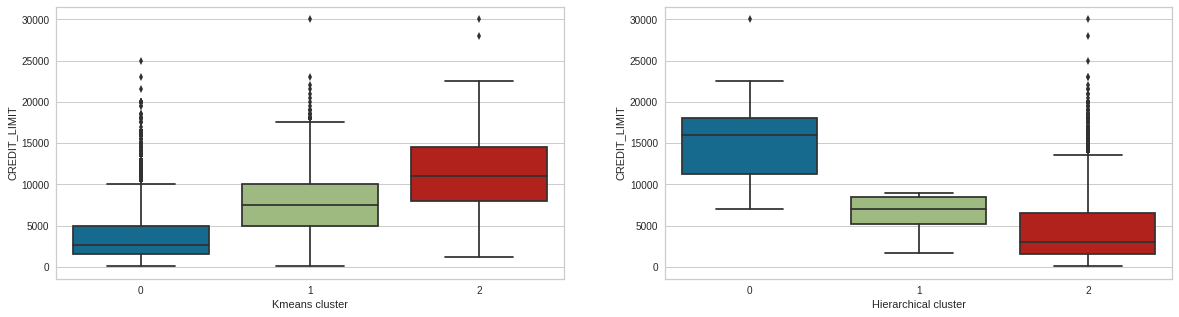

In [34]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(20, 5))
sns.boxplot(x= 'Kmeans cluster', y = 'CREDIT_LIMIT', data = data, ax=axs[0])
sns.boxplot(x='Hierarchical cluster', y = 'CREDIT_LIMIT', data = data, ax=axs[1])#.set_title('Hierarchical cluster') 